In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
M = 1000

a0 = 1.2
a1 = 2.66

x1 = np.random.rand(M, 1)

# Non-linear model.
y = a0*np.exp(a1*x1)

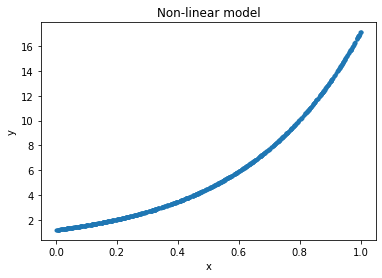

In [3]:
plt.plot(x1, y, '.')
plt.title('Non-linear model')
plt.xlabel('x')
plt.ylabel('y')
# Save figure
plt.savefig("non-linear-model.png", dpi=600)
plt.show()

# Linearization

In [4]:
# Linearized model.
#y_ = np.log(a0) + a1*x1

y_ = np.log(y)
y_ = y_.reshape(M,1)

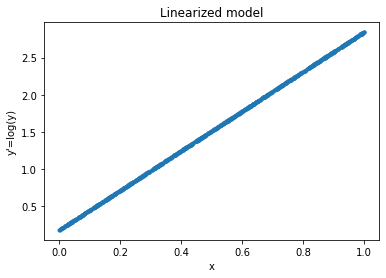

In [6]:
plt.plot(x1, y_, '.')
plt.title('Linearized model')
plt.xlabel('x')
plt.ylabel("y'=log(y)")
# Save figure
plt.savefig("linearized-model.png", dpi=600)
plt.show()

In [21]:
# Generate values for parameters.
N = 200
a0_ = np.linspace(-12.0, 14.0, N)
a1_ = np.linspace(-12.0, 14.0, N)

A0, A1 = np.meshgrid(a0_, a1_)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A0[iter1][iter2] + A1[iter1][iter2]*x1
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_ - yhat))

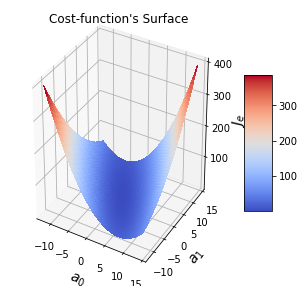

In [22]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
plt.savefig("error_surface_linearization.png", dpi=600)
#Show the plot.
plt.show()

In [23]:
# Concatenate both column vectors.
X = np.c_[np.ones((M,1)), x1]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_))

In [24]:
def batchGradientDescent(X, y, alpha=0.4, n_iterations=1000, precision=0.0001):
    """Batch gradient descent solution."""
    
    M = len(y)
    
    # Random initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_iterations+1)

    Jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    grad_hist = np.zeros((2, n_iterations))
    while iteration < n_iterations and error > precision:
        gradients = -(2.0/M)*X.T.dot(y - X.dot(a))
        grad_hist[:, iteration] = gradients.reshape(2,)
        a = a - alpha*gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        Jgd[iteration+1] = (1.0/M)*sum(np.power((y - X.dot(a)), 2))
        error = np.abs(Jgd[iteration+1] - Jgd[iteration])
        iteration = iteration + 1
    return a, Jgd, a_hist, grad_hist, iteration

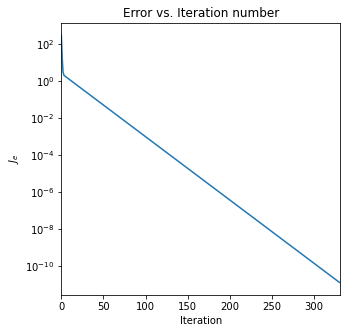

In [25]:
# learning rate.
alpha = 0.3

# Maximum number of iterations.
n_iterations = 10000

# Precision of the stop criteria.
precision = 1e-12

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(X, y_, alpha, n_iterations, precision)

fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
# Save figure
plt.savefig("error-vs-iteration-number-linearization.png", dpi=600)
plt.show()

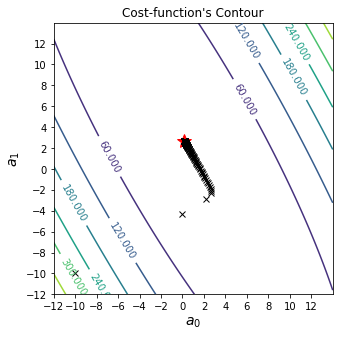

In [26]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.savefig("error_contour_linearization.png", dpi=600)
plt.show()

In [27]:
print('a0:',np.log(a0))
print('a1:',a1)

print('a0_opt:',a_opt[0][0])
print('a1_opt:',a_opt[1][0])

print('a0_gd:',a[0][0])
print('a1_gd:',a[1][0])

a0: 0.1823215567939546
a1: 2.66
a0_opt: 0.182321556793954
a1_opt: 2.660000000000002
a0_gd: 0.18232799803119543
a1_gd: 2.6599881297094403
